In [1]:
import xarray as xr

In [2]:
df_l = xr.open_dataset(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/Low_res_ACCESS-ESM1-5_ensemble.nc')
df = xr.open_dataset(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/NIWA-REMS_AI_P_T_indicators.nc')
df_l = df_l# - df_l.sel(year = slice("1986","2005")).mean("year")
df = df# - df.sel(year = slice("1986","2005")).mean("year")
# Loa'

In [3]:
static_fields = xr.open_dataset(r'/nesi/project/niwa03712/group_shared/Emulator_training_data/ERA5_eval_ccam_12km.198110_NZ_Invariant.nc')

In [141]:
z= np.arange(0, 12, 0.1)

In [145]:
(z + 0.25 *z).var()

18.748697916666668

In [146]:
(z).var()

11.999166666666667

In [59]:
dim = "year"

In [60]:
rx1day_variance_clim = df.Rx1day.sel(GCM_variant = df.GCM =='ACCESS-ESM1-5').sel(year = slice("1986","2005")).mean("year").mean("GCM_variant")
rx1day_variance = (df.Rx1day.sel(GCM_variant = df.GCM =='ACCESS-ESM1-5') - rx1day_variance_clim).rolling({dim: 10}, min_periods=6).mean().var("GCM_variant")



rx10y_variance_clim = df.Rx1day.sel(GCM_variant = df.GCM =='ACCESS-ESM1-5').rolling(year =10, min_periods =5).max().sel(year = slice("1986","2005")).mean("year").mean("GCM_variant")
rx10y_variance = (df.Rx1day.sel(GCM_variant = df.GCM =='ACCESS-ESM1-5').rolling(year =10, min_periods =5).max()- rx10y_variance_clim).rolling({dim: 10}, min_periods=6).mean().var("GCM_variant")


rx20y_variance_clim = df.Rx1day.sel(GCM_variant = df.GCM =='ACCESS-ESM1-5').rolling(year =20, min_periods =15).max().sel(year = slice("1986","2005")).mean("year").mean("GCM_variant")
rx20y_variance = (df.Rx1day.sel(GCM_variant = df.GCM =='ACCESS-ESM1-5').rolling(year =20, min_periods =15).max()- rx20y_variance_clim).rolling({dim: 10}, min_periods=6).mean().var("GCM_variant")


In [137]:
rx1day_variance_clim_c = df.Rx1day.sel(GCM_variant = df.GCM =='CanESM5').sel(year = slice("1986","2005")).mean("year").mean("GCM_variant")
rx1day_variance_c = (df.Rx1day.sel(GCM_variant = df.GCM =='CanESM5') - rx1day_variance_clim_c).var("GCM_variant")



rx10y_variance_clim_c = df.Rx1day.sel(GCM_variant = df.GCM =='CanESM5').rolling(year =10, min_periods =5).max().sel(year = slice("1986","2005")).mean("year").mean("GCM_variant")
rx10y_variance_c = (df.Rx1day.sel(GCM_variant = df.GCM =='CanESM5').rolling(year =10, min_periods =5).max()- rx10y_variance_clim_c).var("GCM_variant")


rx20y_variance_clim_c = df.Rx1day.sel(GCM_variant = df.GCM =='CanESM5').rolling(year =20, min_periods =15).max().sel(year = slice("1986","2005")).mean("year").mean("GCM_variant")
rx20y_variance_c = (df.Rx1day.sel(GCM_variant = df.GCM =='CanESM5').rolling(year =20, min_periods =15).max()- rx20y_variance_clim_c).var("GCM_variant")


In [81]:
rx1day_variance_clim2 = df.Rx1day.sel(GCM_variant = df.GCM =='ACCESS-ESM1-5').sel(year = slice("1986","2005")).mean("year").mean("GCM_variant")
rx1day_variance2 = (df.Rx1day.sel(GCM_variant = df.GCM =='ACCESS-ESM1-5') - rx1day_variance_clim).var("GCM_variant")



rx10y_variance_clim2 = df.Rx1day.sel(GCM_variant = df.GCM =='ACCESS-ESM1-5').rolling(year =10, min_periods =5).max().sel(year = slice("1986","2005")).mean("year").mean("GCM_variant")
rx10y_variance2 = (df.Rx1day.sel(GCM_variant = df.GCM =='ACCESS-ESM1-5').rolling(year =10, min_periods =5).max()- rx10y_variance_clim).var("GCM_variant")


rx20y_variance_clim2 = df.Rx1day.sel(GCM_variant = df.GCM =='ACCESS-ESM1-5').rolling(year =20, min_periods =15).max().sel(year = slice("1986","2005")).mean("year").mean("GCM_variant")
rx20y_variance2 = (df.Rx1day.sel(GCM_variant = df.GCM =='ACCESS-ESM1-5').rolling(year =20, min_periods =15).max()- rx20y_variance_clim).var("GCM_variant")


In [70]:
rx1day_variance_clim_l = df_l.Rx1day.sel(year = slice("1986","2005")).mean("year").mean("GCM_variant") * 86400
rx1day_variance_l = (df_l.Rx1day *86400- rx1day_variance_clim_l).rolling({dim: 10}, min_periods=6).mean().var("GCM_variant")



rx10y_variance_clim_l = df_l.Rx1day.rolling(year =10, min_periods =5).max().sel(year = slice("1986","2005")).mean("year").mean("GCM_variant") *86400
rx10y_variance_l = (df_l.Rx1day.rolling(year =10, min_periods =5).max()*86400- rx10y_variance_clim_l).rolling({dim: 10}, min_periods=6).mean().var("GCM_variant")


rx20y_variance_clim_l = df_l.Rx1day.rolling(year =20, min_periods =15).max().sel(year = slice("1986","2005")).mean("year").mean("GCM_variant") *86400
rx20y_variance_l = (df_l.Rx1day.rolling(year =20, min_periods =15).max()*86400- rx20y_variance_clim_l).rolling({dim: 10}, min_periods=6).mean().var("GCM_variant")


In [71]:
rx1day_variance_clim_l2 = df_l.Rx1day.sel(year = slice("1986","2005")).mean("year").mean("GCM_variant") * 86400
rx1day_variance_l2 = (df_l.Rx1day *86400- rx1day_variance_clim_l).var("GCM_variant")



rx10y_variance_clim_l2 = df_l.Rx1day.rolling(year =10, min_periods =5).max().sel(year = slice("1986","2005")).mean("year").mean("GCM_variant") *86400
rx10y_variance_l2 = (df_l.Rx1day.rolling(year =10, min_periods =5).max()*86400- rx10y_variance_clim_l).var("GCM_variant")


rx20y_variance_clim_l2 = df_l.Rx1day.rolling(year =20, min_periods =15).max().sel(year = slice("1986","2005")).mean("year").mean("GCM_variant") *86400
rx20y_variance_l2 = (df_l.Rx1day.rolling(year =20, min_periods =15).max()*86400- rx20y_variance_clim_l).var("GCM_variant")


In [78]:
rx20y_variance_l = rx20y_variance_l.interp(lat = rx20y_variance.lat, lon =rx20y_variance.lon, method ='nearest', kwargs = dict(fill_value ='extrapolate'))

In [73]:
rx20y_variance_l2 = rx20y_variance_l2.interp(lat = rx20y_variance.lat, lon =rx20y_variance.lon, method ='nearest', kwargs = dict(fill_value ='extrapolate'))

In [77]:
rx10y_variance_l = rx10y_variance_l.interp(lat = rx20y_variance.lat, lon =rx20y_variance.lon, method ='nearest', kwargs = dict(fill_value ='extrapolate'))

In [74]:
rx10y_variance_l2 = rx10y_variance_l2.interp(lat = rx20y_variance.lat, lon =rx20y_variance.lon, method ='nearest', kwargs = dict(fill_value ='extrapolate'))

In [76]:
rx1day_variance_l = rx1day_variance_l.interp(lat = rx20y_variance.lat, lon =rx20y_variance.lon, method ='nearest', kwargs = dict(fill_value ='extrapolate'))

In [75]:
rx1day_variance_l2 = rx1day_variance_l2.interp(lat = rx20y_variance.lat, lon =rx20y_variance.lon, method ='nearest', kwargs = dict(fill_value ='extrapolate'))

In [102]:
# rx10y_variance = df.Rx1day.sel(GCM_variant = df.GCM =='ACCESS-ESM1-5').rolling(year =10, min_periods =5).max().var("GCM_variant")

In [103]:
# rx10y_variance_l = (df_l.Rx1day*86400).rolling(year =10, min_periods =5).max().var("GCM_variant")

In [104]:
# rx1day_variance_l = (df_l.Rx1day*86400).var("GCM_variant")

In [105]:
# rx10y_variance = df.Rx1day.sel(GCM_variant = df.GCM =='ACCESS-ESM1-5').rolling(year =10, min_periods =5).max().var("GCM_variant")

In [19]:
import matplotlib.pyplot as plt
import numpy as np

824.7704842098831 1260.694232687638 $\mathrm{RX}_{10y,\ GAN}$
1138.2239257350634 1813.1052341800416 $\mathrm{RX}_{20y,\ GAN}$
98.98727156045635 135.92163268905668 $\mathrm{RX1Day}_{GAN}$
215.57061530323352 317.6923576116849 $\mathrm{RX}_{10y,\ GCM}$
267.699916481954 366.0208549674891 $\mathrm{RX}_{20y,\ GCM}$
30.66068351534584 52.98067721746365 $\mathrm{RX1Day}_{GCM}$


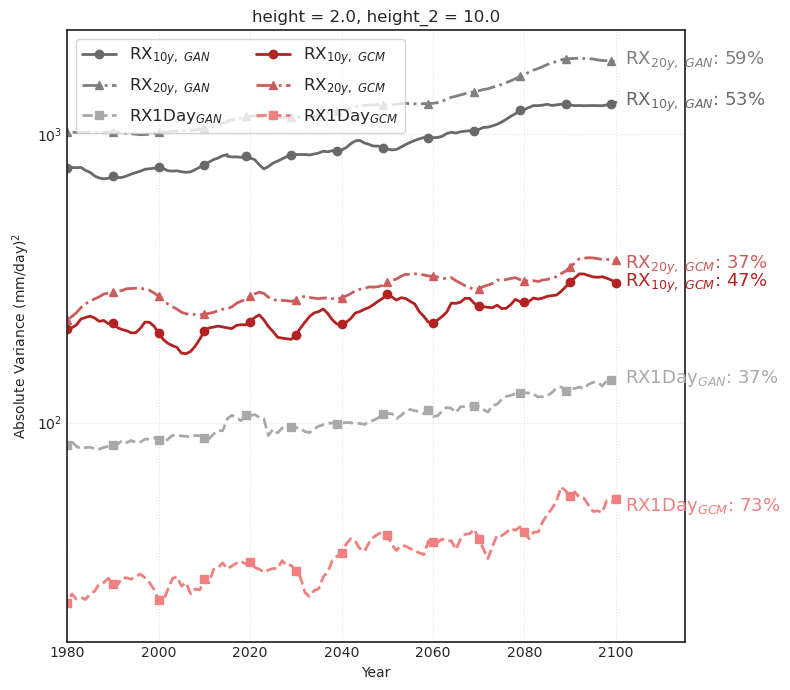

In [79]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(8, 7))

# Smooth 5-year rolling helper
def smoothed(data):
    return data#data.rolling(year=5, center=True, min_periods=1).mean()

# Mean over land points only
def land_mean(data):
    return smoothed(data.where(static_fields.orog > 0, np.nan).mean(["lat", "lon"]))

# Smoothed and land-averaged time series
rx10y_gan = land_mean(rx10y_variance)
rx20y_gan = land_mean(rx20y_variance)
rx1day_gan = land_mean(rx1day_variance)

rx10y_raw = land_mean(rx10y_variance_l)
rx20y_raw = land_mean(rx20y_variance_l)
rx1day_raw = land_mean(rx1day_variance_l)

# === Plot GAN (grayscale with markers) ===
rx10y_gan.plot(color='dimgray', label=r"$\mathrm{RX}_{10y,\ GAN}$", ax=ax, linewidth=2, marker='o', markevery=10)
rx20y_gan.plot(color='gray', label=r"$\mathrm{RX}_{20y,\ GAN}$", ax=ax, linestyle='-.', linewidth=2, marker='^', markevery=10)
rx1day_gan.plot(color='darkgray', label='RX1Day$_{GAN}$', ax=ax, linestyle='--', linewidth=2, marker='s', markevery=10)

# === Plot RAW GCM (red shades with markers) ===
rx10y_raw.plot(color='firebrick', label=r"$\mathrm{RX}_{10y,\ GCM}$", ax=ax, linewidth=2, marker='o', markevery=10)
rx20y_raw.plot(color='indianred', label=r"$\mathrm{RX}_{20y,\ GCM}$", ax=ax, linestyle='-.', linewidth=2, marker='^', markevery=10)
rx1day_raw.plot(color='lightcoral', label='RX1Day$_{GCM}$', ax=ax, linestyle='--', linewidth=2, marker='s', markevery=10)

# === Axis formatting ===
ax.set_ylabel('Absolute Variance (mm/day)$^2$')
ax.set_xlabel('Year')
ax.grid(True, linestyle=':', alpha=0.5)
ax.legend(loc='upper left', frameon=True, fontsize =12, ncol =2)
ax.set_xlim([1980, 2115])

# === Annotate % increases ===
def annotate_pct_change(ts, label, ypos, color):
    baseline = ts.sel(year=slice(2015, 2034)).mean().item()
    future = ts.sel(year=slice(2090, 2100)).mean().item()
    print(baseline, future, label)
    pct = 100 * (future - baseline) / baseline
    ax.text(2102, ypos, f"{label}: {pct:.0f}%", fontsize=13, va='center', color=color)

# Annotate GAN (gray)
annotate_pct_change(rx10y_gan, r"$\mathrm{RX}_{10y,\ GAN}$", ypos=rx10y_gan[-1].item() + 0.5, color='dimgray')
annotate_pct_change(rx20y_gan, r"$\mathrm{RX}_{20y,\ GAN}$", ypos=rx20y_gan[-1].item(), color='gray')
annotate_pct_change(rx1day_gan, r"$\mathrm{RX1Day}_{GAN}$", ypos=rx1day_gan[-1].item() - 0.5, color='darkgray')

annotate_pct_change(rx10y_raw, r"$\mathrm{RX}_{10y,\ GCM}$", ypos=rx10y_raw[-1].item() - 1.5, color='firebrick')
annotate_pct_change(rx20y_raw, r"$\mathrm{RX}_{20y,\ GCM}$", ypos=rx20y_raw[-1].item() - 15.5, color='indianred')
annotate_pct_change(rx1day_raw, r"$\mathrm{RX1Day}_{GCM}$", ypos=rx1day_raw[-1].item() - 3.5, color='lightcoral')

ax.set_yscale('log')
plt.tight_layout()
plt.show()


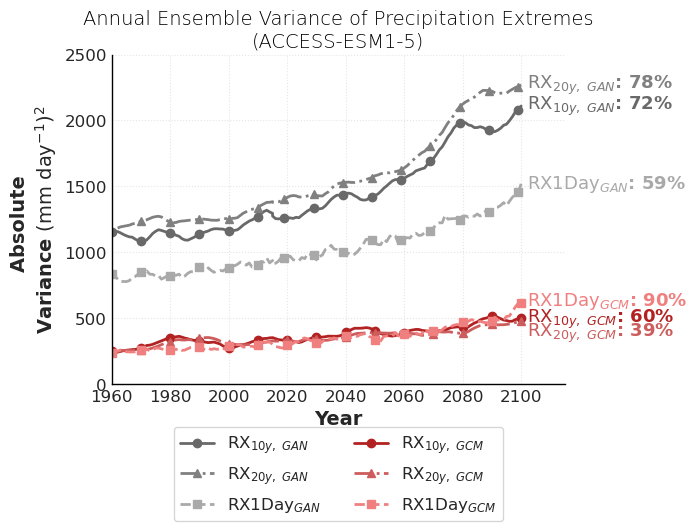

In [135]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(7, 6))

# === Helper functions ===
def smoothed(data):
    return data.rolling(year=5, center=True, min_periods=1).mean()

def land_mean(data):
    return smoothed(data.where(static_fields.orog > 0, np.nan).mean(["lat", "lon"]))

# === Processed series ===
rx10y_gan = land_mean(rx10y_variance2)
rx20y_gan = land_mean(rx20y_variance2)
rx1day_gan = land_mean(rx1day_variance2)

rx10y_raw = land_mean(rx10y_variance_l2)
rx20y_raw = land_mean(rx20y_variance_l2)
rx1day_raw = land_mean(rx1day_variance_l2)

# === Plot GAN ===
rx10y_gan.plot(color='dimgray', label=r"$\mathrm{RX}_{10y,\ GAN}$", ax=ax, linewidth=2, marker='o', markevery=10)
rx20y_gan.plot(color='gray', label=r"$\mathrm{RX}_{20y,\ GAN}$", ax=ax, linestyle='-.', linewidth=2, marker='^', markevery=10)
rx1day_gan.plot(color='darkgray', label='RX1Day$_{GAN}$', ax=ax, linestyle='--', linewidth=2, marker='s', markevery=10)

# === Plot GCM ===
rx10y_raw.plot(color='firebrick', label=r"$\mathrm{RX}_{10y,\ GCM}$", ax=ax, linewidth=2, marker='o', markevery=10)
rx20y_raw.plot(color='indianred', label=r"$\mathrm{RX}_{20y,\ GCM}$", ax=ax, linestyle='-.', linewidth=2, marker='^', markevery=10)
rx1day_raw.plot(color='lightcoral', label='RX1Day$_{GCM}$', ax=ax, linestyle='--', linewidth=2, marker='s', markevery=10)

# === Axis formatting ===
ax.set_ylabel('Absolute \nVariance $(\\mathrm{mm}~\\mathrm{day}^{-1})^2$', fontsize=14, weight='bold')
ax.set_xlabel('Year', fontsize=14, weight='bold')
ax.grid(True, linestyle=':', alpha=0.5)
ax.set_xlim([1960, 2115])
ax.set_ylim(0, 2500)
ax.tick_params(labelsize=12)

# Remove all borders/spines
for spine in ax.spines.values():
    spine.set_visible(False)

# === Legend and Title ===
ax.legend(loc='lower center', frameon=True, fontsize=12, ncol=2, bbox_to_anchor=(0.5, -0.44))
ax.set_title(
    'Annual Ensemble Variance of Precipitation Extremes\n(ACCESS-ESM1-5)',
    fontdict={'color': 'black', 'weight': 'light', 'size': 14}
)

# === Annotate % changes ===
def annotate_pct_change(ts, label, ypos, color):
    baseline = ts.sel(year=slice(1986, 2005)).mean().item()
    future = ts.sel(year=slice(2090, 2100)).mean().item()
    pct = 100 * (future - baseline) / baseline
    ax.text(2102, ypos, f"{label}: {pct:.0f}%", fontsize=13, va='center', color=color, weight='bold')

annotate_pct_change(rx10y_gan, r"$\mathrm{RX}_{10y,\ GAN}$", rx10y_gan[-1].item() + 0.5, 'dimgray')
annotate_pct_change(rx20y_gan, r"$\mathrm{RX}_{20y,\ GAN}$", rx20y_gan[-1].item(), 'gray')
annotate_pct_change(rx1day_gan, r"$\mathrm{RX1Day}_{GAN}$", rx1day_gan[-1].item() - 0.5, 'darkgray')

annotate_pct_change(rx10y_raw, r"$\mathrm{RX}_{10y,\ GCM}$", rx10y_raw[-1].item() - 1.5, 'firebrick')
annotate_pct_change(rx20y_raw, r"$\mathrm{RX}_{20y,\ GCM}$", rx20y_raw[-1].item() - 85.5, 'indianred')
annotate_pct_change(rx1day_raw, r"$\mathrm{RX1Day}_{GCM}$", rx1day_raw[-1].item() + 20.5, 'lightcoral')
# === Format spines: keep left and bottom only ===
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

for spine in ['left', 'bottom']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_color('black')
    ax.spines[spine].set_linewidth(1)

# === Show plot ===
plt.tight_layout()
plt.show()
fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/Downscaling-with-AI-reveals-large-role-of-internal-variability-in-fine-scale-projections-of-climate-extremes/Figures/Figure5/Figure5.pdf', dpi =500, bbox_inches ='tight')
fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/Downscaling-with-AI-reveals-large-role-of-internal-variability-in-fine-scale-projections-of-climate-extremes/Figures/Figure5/Figure5.png', dpi =500, bbox_inches ='tight')

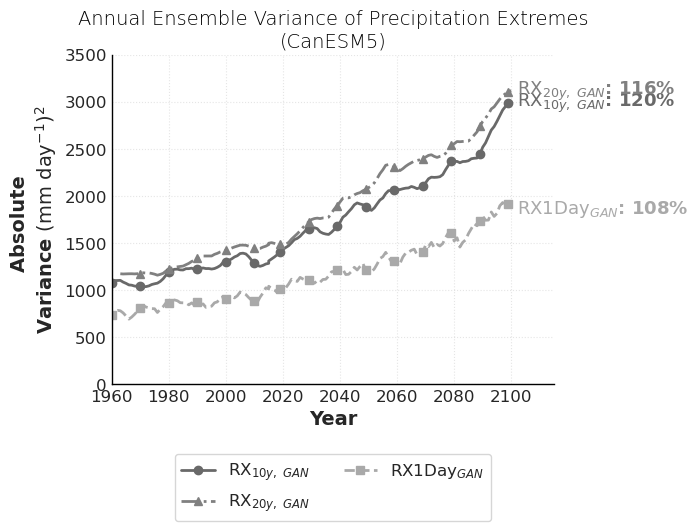

In [140]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(7, 6))

# === Helper functions ===
def smoothed(data):
    return data.rolling(year=5, center=True, min_periods=1).mean()

def land_mean(data):
    return smoothed(data.where(static_fields.orog > 0, np.nan).mean(["lat", "lon"]))

# === Processed series ===
rx10y_gan = land_mean(rx10y_variance_c)
rx20y_gan = land_mean(rx20y_variance_c)
rx1day_gan = land_mean(rx1day_variance_c)

# rx10y_raw = land_mean(rx10y_variance_l2)
# rx20y_raw = land_mean(rx20y_variance_l2)
# rx1day_raw = land_mean(rx1day_variance_l2)

# === Plot GAN ===
rx10y_gan.plot(color='dimgray', label=r"$\mathrm{RX}_{10y,\ GAN}$", ax=ax, linewidth=2, marker='o', markevery=10)
rx20y_gan.plot(color='gray', label=r"$\mathrm{RX}_{20y,\ GAN}$", ax=ax, linestyle='-.', linewidth=2, marker='^', markevery=10)
rx1day_gan.plot(color='darkgray', label='RX1Day$_{GAN}$', ax=ax, linestyle='--', linewidth=2, marker='s', markevery=10)

# === Plot GCM ===
# rx10y_raw.plot(color='firebrick', label=r"$\mathrm{RX}_{10y,\ GCM}$", ax=ax, linewidth=2, marker='o', markevery=10)
# rx20y_raw.plot(color='indianred', label=r"$\mathrm{RX}_{20y,\ GCM}$", ax=ax, linestyle='-.', linewidth=2, marker='^', markevery=10)
# rx1day_raw.plot(color='lightcoral', label='RX1Day$_{GCM}$', ax=ax, linestyle='--', linewidth=2, marker='s', markevery=10)

# === Axis formatting ===
ax.set_ylabel('Absolute \nVariance $(\\mathrm{mm}~\\mathrm{day}^{-1})^2$', fontsize=14, weight='bold')
ax.set_xlabel('Year', fontsize=14, weight='bold')
ax.grid(True, linestyle=':', alpha=0.5)
ax.set_xlim([1960, 2115])
ax.set_ylim(0, 3500)
ax.tick_params(labelsize=12)

# Remove all borders/spines
for spine in ax.spines.values():
    spine.set_visible(False)

# === Legend and Title ===
ax.legend(loc='lower center', frameon=True, fontsize=12, ncol=2, bbox_to_anchor=(0.5, -0.44))
ax.set_title(
    'Annual Ensemble Variance of Precipitation Extremes\n(CanESM5)',
    fontdict={'color': 'black', 'weight': 'light', 'size': 14}
)

# === Annotate % changes ===
def annotate_pct_change(ts, label, ypos, color):
    baseline = ts.sel(year=slice(1986, 2005)).mean().item()
    future = ts.sel(year=slice(2090, 2100)).mean().item()
    pct = 100 * (future - baseline) / baseline
    ax.text(2102, ypos, f"{label}: {pct:.0f}%", fontsize=13, va='center', color=color, weight='bold')

annotate_pct_change(rx10y_gan, r"$\mathrm{RX}_{10y,\ GAN}$", rx10y_gan[-1].item() + 0.5, 'dimgray')
annotate_pct_change(rx20y_gan, r"$\mathrm{RX}_{20y,\ GAN}$", rx20y_gan[-1].item(), 'gray')
annotate_pct_change(rx1day_gan, r"$\mathrm{RX1Day}_{GAN}$", rx1day_gan[-1].item() - 0.5, 'darkgray')

# annotate_pct_change(rx10y_raw, r"$\mathrm{RX}_{10y,\ GCM}$", rx10y_raw[-1].item() - 1.5, 'firebrick')
# annotate_pct_change(rx20y_raw, r"$\mathrm{RX}_{20y,\ GCM}$", rx20y_raw[-1].item() - 85.5, 'indianred')
# annotate_pct_change(rx1day_raw, r"$\mathrm{RX1Day}_{GCM}$", rx1day_raw[-1].item() + 20.5, 'lightcoral')
# === Format spines: keep left and bottom only ===
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

for spine in ['left', 'bottom']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_color('black')
    ax.spines[spine].set_linewidth(1)

# === Show plot ===
plt.tight_layout()
plt.show()
fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/Downscaling-with-AI-reveals-large-role-of-internal-variability-in-fine-scale-projections-of-climate-extremes/Figures/Figure5/Figure5_supp.pdf', dpi =500, bbox_inches ='tight')
fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/Downscaling-with-AI-reveals-large-role-of-internal-variability-in-fine-scale-projections-of-climate-extremes/Figures/Figure5/Figure5_supp.png', dpi =500, bbox_inches ='tight')

824.874780648767 1260.5898022327594 $\mathrm{RX}_{10y,\ GAN}$
1138.2491138576893 1812.6452687154604 $\mathrm{RX}_{20y,\ GAN}$
98.81946971306401 135.79485451672073 $\mathrm{RX1Day}_{GAN}$
215.8377349919528 316.8978233111791 $\mathrm{RX}_{10y,\ GCM}$
267.57613843896024 365.1122888263278 $\mathrm{RX}_{20y,\ GCM}$
30.735531884360864 53.07770624434622 $\mathrm{RX1Day}_{GCM}$


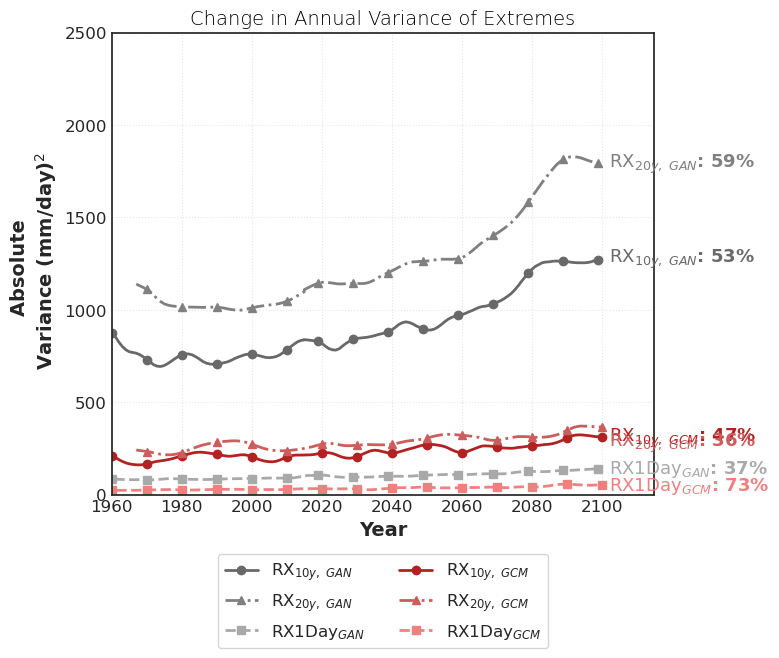

In [122]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(7, 6))

# Smooth 5-year rolling helper
def smoothed(data):
    return data.rolling(year=5, center=True, min_periods=1).mean()

# Mean over land points only
def land_mean(data):
    return smoothed(data.where(static_fields.orog > 0, np.nan).mean(["lat", "lon"]))

# Smoothed and land-averaged time series
rx10y_gan = land_mean(rx10y_variance)
rx20y_gan = land_mean(rx20y_variance)
rx1day_gan = land_mean(rx1day_variance)

rx10y_raw = land_mean(rx10y_variance_l)
rx20y_raw = land_mean(rx20y_variance_l)
rx1day_raw = land_mean(rx1day_variance_l)

# === Plot GAN (grayscale with markers) ===
rx10y_gan.plot(color='dimgray', label=r"$\mathrm{RX}_{10y,\ GAN}$", ax=ax, linewidth=2, marker='o', markevery=10)
rx20y_gan.plot(color='gray', label=r"$\mathrm{RX}_{20y,\ GAN}$", ax=ax, linestyle='-.', linewidth=2, marker='^', markevery=10)
rx1day_gan.plot(color='darkgray', label='RX1Day$_{GAN}$', ax=ax, linestyle='--', linewidth=2, marker='s', markevery=10)

# === Plot RAW GCM (red shades with markers) ===
rx10y_raw.plot(color='firebrick', label=r"$\mathrm{RX}_{10y,\ GCM}$", ax=ax, linewidth=2, marker='o', markevery=10)
rx20y_raw.plot(color='indianred', label=r"$\mathrm{RX}_{20y,\ GCM}$", ax=ax, linestyle='-.', linewidth=2, marker='^', markevery=10)
rx1day_raw.plot(color='lightcoral', label='RX1Day$_{GCM}$', ax=ax, linestyle='--', linewidth=2, marker='s', markevery=10)

# === Axis formatting ===
ax.set_ylabel('Absolute \n Variance (mm/day)$^2$', fontsize =14, weight ='bold')
ax.set_xlabel('Year', fontsize =14, weight ='bold')
ax.grid(True, linestyle=':', alpha=0.5)
ax.legend(loc='lower center', frameon=True, fontsize =12, ncol =2, bbox_to_anchor = (0.5 , -0.35))
ax.set_xlim([1960, 2115])

# === Annotate % increases ===
def annotate_pct_change(ts, label, ypos, color):
    baseline = ts.sel(year=slice(2015, 2034)).mean().item()
    future = ts.sel(year=slice(2090, 2100)).mean().item()
    print(baseline, future, label)
    pct = 100 * (future - baseline) / baseline
    ax.text(2102, ypos, f"{label}: {pct:.0f}%", fontsize=13, va='center', color=color, weight ='bold')

# Annotate GAN (gray)
annotate_pct_change(rx10y_gan, r"$\mathrm{RX}_{10y,\ GAN}$", ypos=rx10y_gan[-1].item() + 0.5, color='dimgray')
annotate_pct_change(rx20y_gan, r"$\mathrm{RX}_{20y,\ GAN}$", ypos=rx20y_gan[-1].item(), color='gray')
annotate_pct_change(rx1day_gan, r"$\mathrm{RX1Day}_{GAN}$", ypos=rx1day_gan[-1].item() - 0.5, color='darkgray')

annotate_pct_change(rx10y_raw, r"$\mathrm{RX}_{10y,\ GCM}$", ypos=rx10y_raw[-1].item() - 1.5, color='firebrick')
annotate_pct_change(rx20y_raw, r"$\mathrm{RX}_{20y,\ GCM}$", ypos=rx20y_raw[-1].item() - 85.5, color='indianred')
annotate_pct_change(rx1day_raw, r"$\mathrm{RX1Day}_{GCM}$", ypos=rx1day_raw[-1].item() - 3.5, color='lightcoral')
ax.tick_params(labelsize =12)
#ax.set_yscale('log')
ax.set_ylim(0, 2500)
ax.set_title(
    'Change in Annual Variance of Extremes',
    fontdict={ # font family
        'color':  'black',    # font color
        'weight': 'light',     # 'normal', 'bold', 'light'
        'size': 14            # font size
    }
)
#plt.tight_layout()
plt.show()


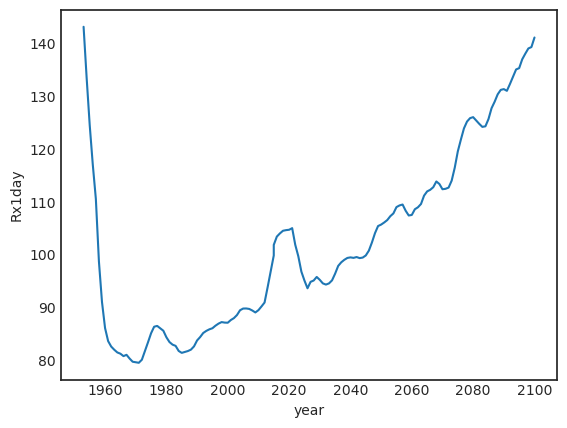

In [124]:
rx1day_gan.plot()

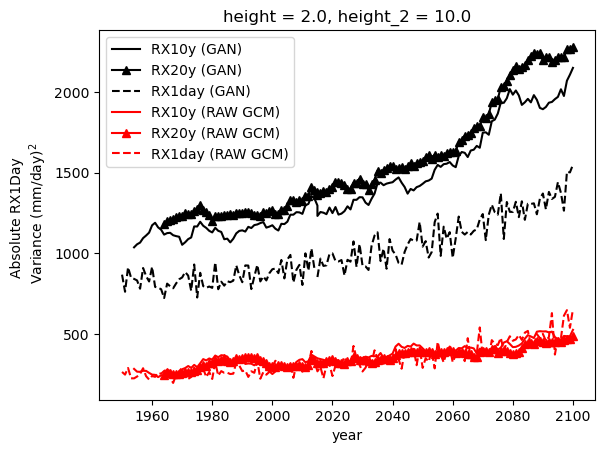

In [27]:
fig, ax = plt.subplots()
rx10y_variance.where(static_fields.orog>0, np.nan).mean(["lat","lon"]).plot(color ='k', label ='RX10y (GAN)', ax = ax)
rx20y_variance.where(static_fields.orog>0, np.nan) .mean(["lat","lon"]).plot(color ='k', label ='RX20y (GAN)', ax = ax, marker ='^')
rx1day_variance.where(static_fields.orog>0, np.nan).mean(["lat","lon"]).plot(color ='k', label ='RX1day (GAN)', ls ='--', ax = ax)
rx10y_variance_l.where(static_fields.orog>0, np.nan) .mean(["lat","lon"]).plot(color ='r', label ='RX10y (RAW GCM)', ax = ax)
rx20y_variance_l.where(static_fields.orog>0, np.nan) .mean(["lat","lon"]).plot(color ='r', label ='RX20y (RAW GCM)', ax = ax, marker ='^')
rx1day_variance_l.where(static_fields.orog>0, np.nan).mean(["lat","lon"]).plot(color ='r', label ='RX1day (RAW GCM)', ls ='--', ax = ax)
ax.set_ylabel('Absolute RX1Day \n Variance (mm/day)$^2$')
ax.legend()
#ax.set_yscale(lambda a: np.sqrt(a))

/tmp/ipykernel_163614/2003537136.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


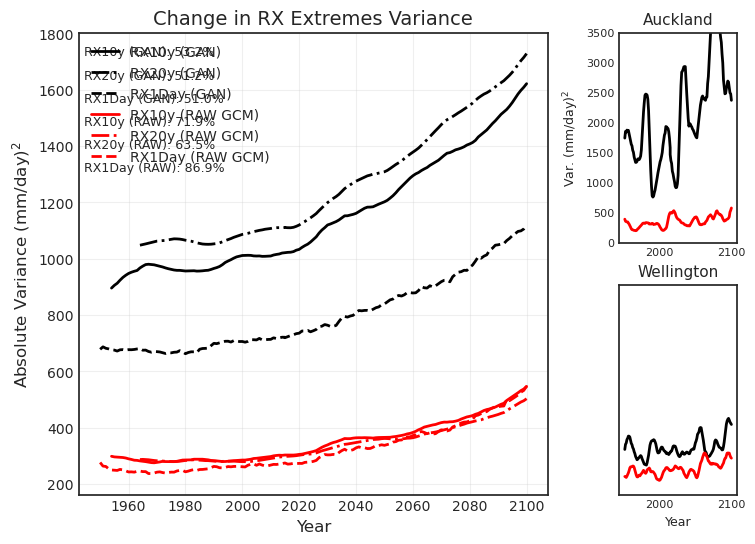

In [36]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import xarray as xr

# Setup
plt.style.use("seaborn-white")
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(2, 4, width_ratios=[4, 1, 1, 0.1], height_ratios=[1, 1], wspace=0.4)

# Extract time series (assume time is along 'year')
years = rx10y_variance.year

# MAIN PANEL (left side)
ax_main = fig.add_subplot(gs[:, 0])

def smooth_plot(data, label, color, linestyle, linewidth=2):
    smoothed = data.rolling(year=10, center=False, min_periods=1).mean()
    #smoothed = smoothed.interp(year=years)  # Ensure same length
    ax_main.plot(smoothed.year, smoothed, label=label, color=color, linestyle=linestyle, linewidth=linewidth)
    
    
smooth_plot(rx10y_variance.mean(["lat", "lon"]), "RX10y (GAN)", 'black', '-', 2)
smooth_plot(rx20y_variance.mean(["lat", "lon"]), "RX20y (GAN)", 'black', '-.', 2)
smooth_plot(rx1day_variance.mean(["lat", "lon"]), "RX1Day (GAN)", 'black', '--', 2)

# Plot RAW GCM (red lines)
smooth_plot(rx10y_variance_l.mean(["lat", "lon"]), "RX10y (RAW GCM)", 'red', '-', 2)
smooth_plot(rx20y_variance_l.mean(["lat", "lon"]), "RX20y (RAW GCM)", 'red', '-.', 2)
smooth_plot(rx1day_variance_l.mean(["lat", "lon"]), "RX1Day (RAW GCM)", 'red', '--', 2)

# Main axis styling
ax_main.set_ylabel("Absolute Variance (mm/day)$^2$", fontsize=12)
ax_main.set_xlabel("Year", fontsize=12)
ax_main.set_title("Change in RX Extremes Variance", fontsize=14)
ax_main.tick_params(labelsize=10)
ax_main.legend(loc='upper left', fontsize=10)
ax_main.grid(True, alpha=0.3)

# Compute and annotate percent increase (1995–2014 mean as baseline)
def percent_increase(data, baseline_years=slice(1995, 2014), final_years=slice(2080, 2100)):
    base = data.sel(year=baseline_years).mean().values
    final = data.sel(year=final_years).mean().values
    return 100 * (final - base) / base

annots = [
    ("RX10y (GAN)", rx10y_variance),
    ("RX20y (GAN)", rx20y_variance),
    ("RX1Day (GAN)", rx1day_variance),
    ("RX10y (RAW)", rx10y_variance_l),
    ("RX20y (RAW)", rx20y_variance_l),
    ("RX1Day (RAW)", rx1day_variance_l),
]

for i, (label, ds) in enumerate(annots):
    val = percent_increase(ds.mean(["lat", "lon"]))
    ax_main.text(0.01, 0.95 - i * 0.05, f"{label}: {val:.1f}%", transform=ax_main.transAxes, fontsize=9)

# CITY PANELS (right side)
city_coords = {
    "Auckland": dict(lat=-36.85, lon=174.76),
    "Wellington": dict(lat=-41.29, lon=174.78)
}

for i, (city, coords) in enumerate(city_coords.items()):
    ax_city = fig.add_subplot(gs[i, 1])
    # Plot for RX10y only (GAN vs RAW)
    for ds, label, color, ls in zip(
        [rx10y_variance, rx10y_variance_l],
        ["GAN", "RAW GCM"],
        ["black", "red"],
        ['-', '-']
    ):
        interp = ds.interp(**coords).rolling(year=5, center=True, min_periods=1).mean()
        ax_city.plot(interp.year, interp, label=label, color=color, linestyle=ls, linewidth=2)
    ax_city.set_title(f"{city}", fontsize=11)
    ax_city.tick_params(labelsize=8)
    ax_city.set_ylim(0,3500)#ax_main.get_ylim())
    if i == 1:
        ax_city.set_xlabel("Year", fontsize=9)

    if i == 0:
        ax_city.set_ylabel("Var. (mm/day)$^2$", fontsize=9)
    else:
        ax_city.set_yticklabels([])

# Tidy layout
fig.tight_layout()
plt.show()


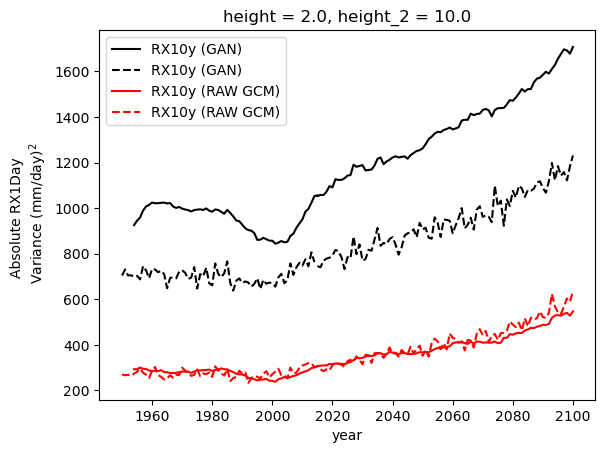

In [107]:
fig, ax = plt.subplots()
rx10y_variance .mean(["lat","lon"]).plot(color ='k', label ='RX10y (GAN)', ax = ax)
rx1day_variance.mean(["lat","lon"]).plot(color ='k', label ='RX10y (GAN)', ls ='--', ax = ax)
rx10y_variance_l .mean(["lat","lon"]).plot(color ='r', label ='RX10y (RAW GCM)', ax = ax)
rx1day_variance_l.mean(["lat","lon"]).plot(color ='r', label ='RX10y (RAW GCM)', ls ='--', ax = ax)
ax.set_ylabel('Absolute RX1Day \n Variance (mm/day)$^2$')
ax.legend()

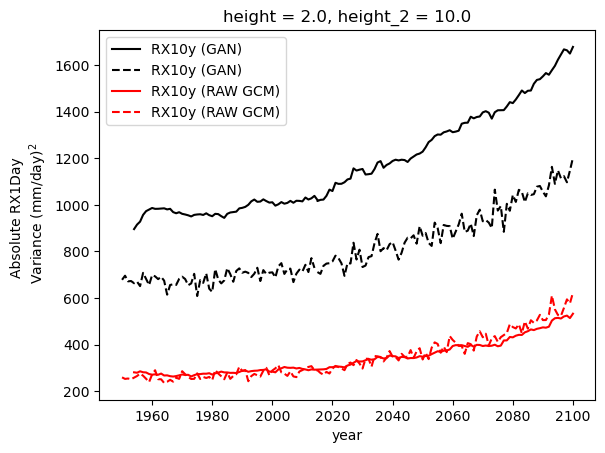

In [83]:
fig, ax = plt.subplots()
rx10y_variance .mean(["lat","lon"]).plot(color ='k', label ='RX10y (GAN)', ax = ax)
rx1day_variance.mean(["lat","lon"]).plot(color ='k', label ='RX10y (GAN)', ls ='--', ax = ax)
rx10y_variance_l .mean(["lat","lon"]).plot(color ='r', label ='RX10y (RAW GCM)', ax = ax)
rx1day_variance_l.mean(["lat","lon"]).plot(color ='r', label ='RX10y (RAW GCM)', ls ='--', ax = ax)
ax.set_ylabel('Absolute RX1Day \n Variance (mm/day)$^2$')
ax.legend()

In [94]:
anomaly = 100 * (df - df.sel(year = slice("1986","2005")).mean("year"))/ df.sel(year = slice("1986","2005")).mean("year")

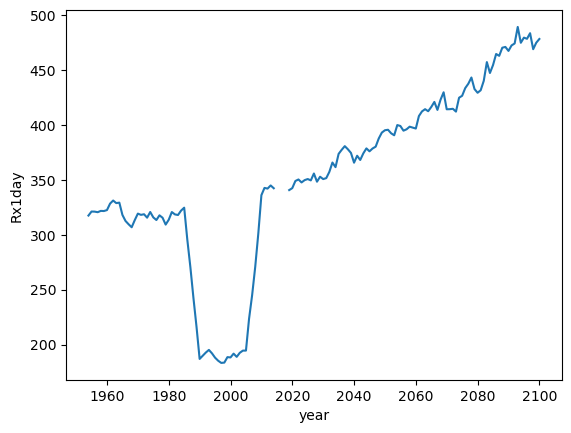

In [98]:
anomaly.rolling(year =5).mean().Rx1day.sel(GCM_variant = anomaly.GCM ==  'ACCESS-ESM1-5').var("GCM_variant").mean(["lat","lon"]).plot()

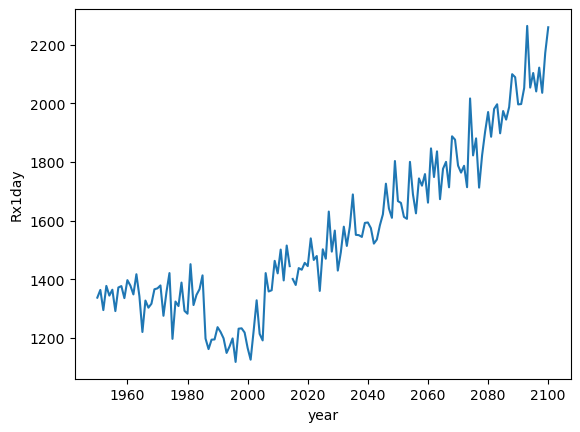

In [95]:
anomaly.Rx1day.sel(GCM_variant = anomaly.GCM ==  'ACCESS-ESM1-5').var("GCM_variant").mean(["lat","lon"]).plot()

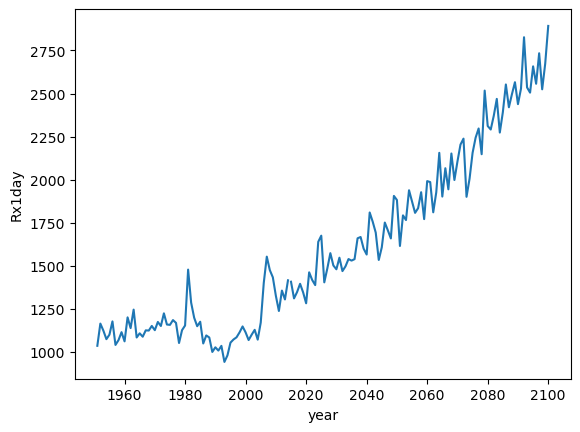

In [96]:
anomaly.Rx1day.sel(GCM_variant = anomaly.GCM ==  'CanESM5').var("GCM_variant").mean(["lat","lon"]).plot()

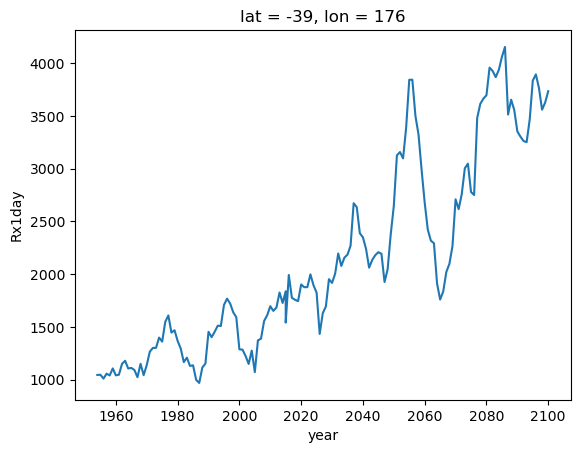

In [58]:
rx1day_variance.interp(lat =-39, lon =176, method ='nearest').rolling(year =10, min_periods =5).mean().plot()

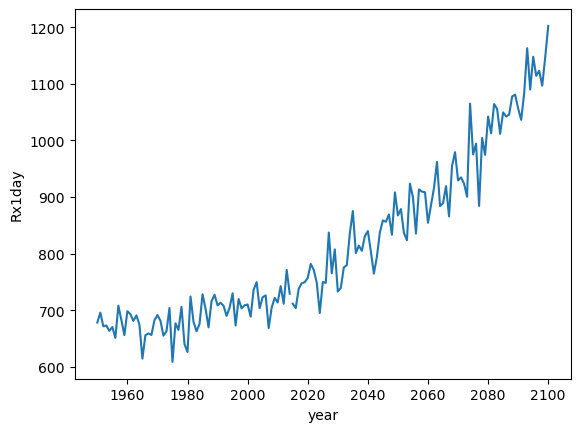

In [53]:
df.Rx1day.sel(GCM_variant = df.GCM =='ACCESS-ESM1-5').var("GCM_variant").mean(["lat","lon"]).plot()

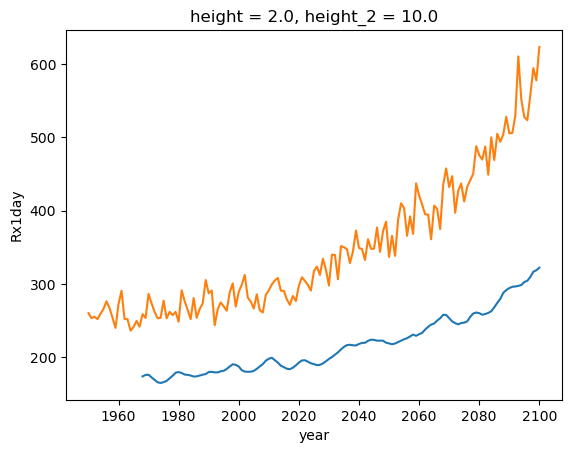

In [47]:
(df.rolling(year =10).max() * 86400).rolling(year =10).mean().Rx1day.var("GCM_variant").mean(["lat","lon"]).plot()
((df *86400).Rx1day.var("GCM_variant")).mean(["lat","lon"]).plot()

In [34]:
df#.pr_seasonal_future#.var("GCM_variant").isel(season =0).mean(["lat","lon"])#.plot()

<xarray.Dataset>
Dimensions:                 (GCM_variant: 40, season: 4, lat: 23, lon: 26, year: 151)
Coordinates:
  * GCM_variant             (GCM_variant) object 'ACCESS-ESM1-5_r10i1p1f1' .....
  * lon                     (lon) float64 150.6 152.1 153.6 ... 186.6 188.1
  * lat                     (lat) float64 -59.38 -57.88 -56.38 ... -27.88 -26.38
    height                  float64 2.0
    height_2                float64 10.0
  * season                  (season) object 'DJF' 'JJA' 'MAM' 'SON'
  * year                    (year) int64 1950 1951 1952 1953 ... 2098 2099 2100
Data variables:
    tasmax_seasonal_future  (GCM_variant, season, lat, lon) float32 280.1 ......
    pr_seasonal_future      (GCM_variant, season, lat, lon) float32 3.653e-05...
    tasmax_seasonal_hist    (GCM_variant, season, lat, lon) float32 278.6 ......
    pr_seasonal_hist        (GCM_variant, season, lat, lon) float32 3.537e-05...
    TXx                     (GCM_variant, year, lat, lon) float32 281.1 ... 3...
    Rx1day                  (GCM_variant, year, lat, lon) float32 0.0002558 ....

In [25]:
df2 = xr.open_dataset(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/internal_variability_data/Multi_Model_Decomposition_pr_LE_IV_v250425_percentage.nc')

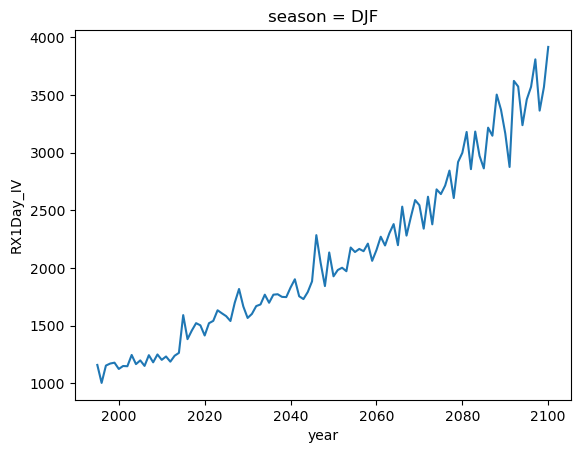

In [28]:
df2.RX1Day_IV.var("GCM_variant").mean(["lat","lon"]).plot()

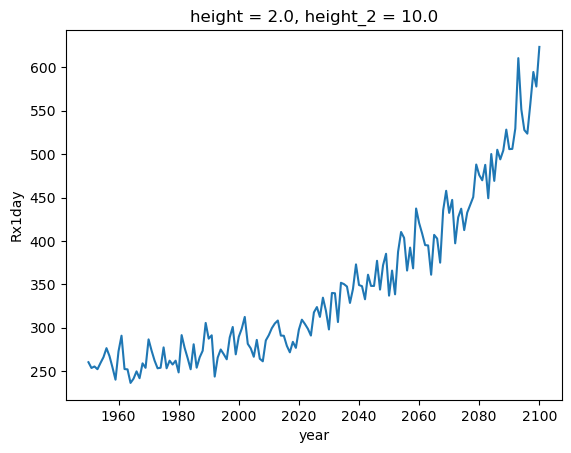

In [30]:
(df.Rx1day*86400).var("GCM_variant").mean(["lat","lon"]).plot()
#df1.RX1Day_IV.sel(GCM_variant = df1.GCM =='ACCESS-ESM1-5').var("GCM_variant").mean(["lat","lon"]).plot()

In [16]:
df1 = xr.open_dataset(r'/nesi/project/niwa00018/ML_downscaling_CCAM/AI_large_ensemble/internal_variability_data/Multi_Model_Decomposition_pr_LE_IV.nc')

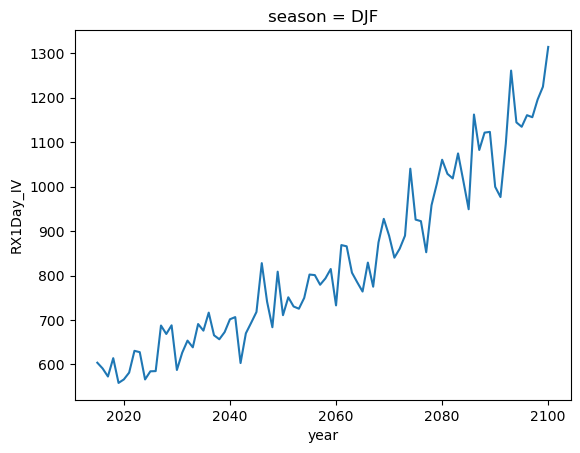

In [20]:
df1.RX1Day_IV.sel(GCM_variant = df1.GCM =='ACCESS-ESM1-5').var("GCM_variant").mean(["lat","lon"]).plot()